In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
data = pd.read_csv('iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [230]:
#sepal length | sepal width | petal length | petal width | class
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [231]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [232]:
data.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [233]:
data['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [234]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


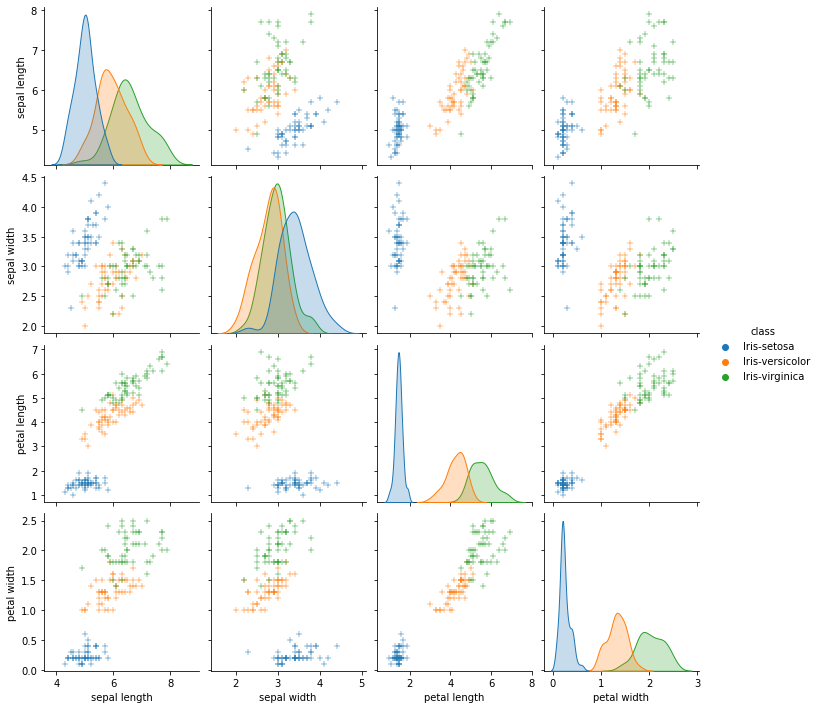

In [235]:
sns.pairplot(data, hue='class', markers='+')

In [236]:
X = data.drop('class', axis=1)
y = data['class']

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [238]:
X_train.shape

(105, 4)

In [239]:
X_test.shape

(45, 4)

In [240]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
acc_scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(metrics.accuracy_score(y_test, y_pred))

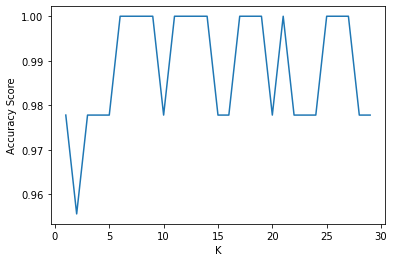

In [241]:
plt.plot(list(range(1,30)), acc_scores)
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

In [242]:
acc_scores

[0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777]

In [243]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_validations = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    cross_validations.append(cross_val_score(knn, X, y, cv=5))
cross_validations

[array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 array([0.96666667, 0.93333333, 0.93333333, 0.9       , 1.        ]),
 array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
 array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 1.        ]),
 array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ]),
 array([0.96666667, 1.        , 0.96666667, 0.93333333, 1.        ]),
 array([0.96666667, 1.        , 1.        , 0.93333333, 1.        ]),
 array([0.93333333, 1.        , 1.        , 0.96666667, 1.        ]),
 array([0.93333333, 1.        , 1.        , 0.96666667, 1.        ]),
 array([0.93333333, 1.        , 0.96666667, 0.96666667, 1.        ]),
 array([0.93333333, 1.        , 0.96666667, 0.93333333, 1.        ]),
 array([0.93333333, 

In [244]:
max_validations = []
for validation in cross_validations:
    max_n = max(validation)
    for i, n in enumerate(validation):
        if n==max_n:
            max_validations.append(i+1)
max_validations

[5,
 5,
 5,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 3,
 5,
 2,
 3,
 5,
 2,
 3,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [245]:
from scipy.stats import mode
mode(max_validations)
#percebe-se que na cross validation os momentos em que K valia 5 deram mais certo em todos os datasets

ModeResult(mode=array([5]), count=array([29]))

In [246]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [247]:
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667
